In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("lending_data.csv")

# Review the DataFrame
print(df.shape)
df.head()

(77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [5]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [6]:
# no imputation
# no encoding
# we need a scaler

In [7]:
# check for imbalance
df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [8]:
# Accuracy Check
2500/len(df)

0.03224308708212959

In [9]:
# Accuracy >97%

In [10]:
# Feature selection
# correlation analysis
corrs = df.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


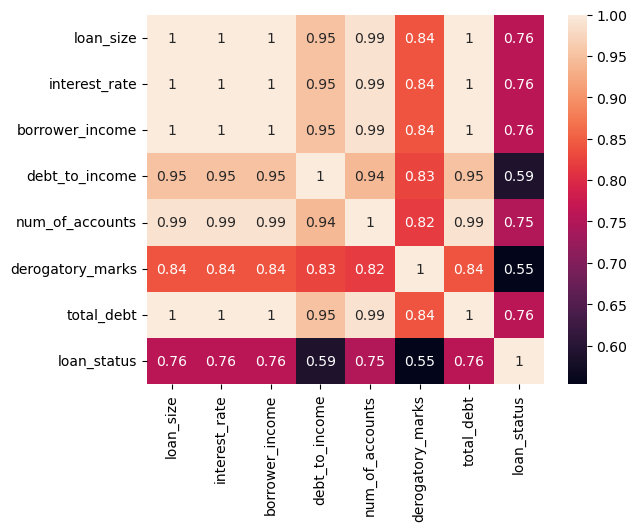

In [11]:
sns.heatmap(corrs, annot=True)
plt.show()

In [12]:
abs(corrs.loan_status).sort_values(ascending=False)

loan_status         1.000000
interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
Name: loan_status, dtype: float64

In [13]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [14]:
# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns=['loan_status'])


In [15]:
# Review the y variable Series
# View the first few rows of the y variable
print("First few rows of y:")
print(y.head())

# Check the distribution of values in y
print("\nDistribution of values in y:")
print(y.value_counts())

# Summary statistics
print("\nSummary statistics of y:")
print(y.describe())

First few rows of y:
0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

Distribution of values in y:
loan_status
0    75036
1     2500
Name: count, dtype: int64

Summary statistics of y:
count    77536.000000
mean         0.032243
std          0.176646
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64


In [16]:
# Review the X variable DataFrame
# View the first few rows of the X variable
print("First few rows of X:")
print(X.head())

# Check the data types and non-null counts
print("\nData types and non-null counts:")
print(X.info())

# Summary statistics for numerical features
print("\nSummary statistics of X:")
print(X.describe())

# Check for missing values
print("\nMissing values in X:")
print(X.isnull().sum())


First few rows of X:
   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  
0                 1       22800  
1                 0       13600  
2                 0       16100  
3                 1       22700  
4                 1       23000  

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   i

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [17]:
# Import the train_test_learn module
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=1)  # Ensures reproducibility)
    
# Print shapes to confirm the split
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")



Training feature set shape: (62028, 7)
Testing feature set shape: (15508, 7)
Training labels shape: (62028,)
Testing labels shape: (15508,)


## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [18]:
# Instantiate the Logistic Regression model with a random_state for reproducibility
model = LogisticRegression(random_state=1)

# Fit the model using the training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [19]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)

# Print the first few predictions to verify
print("First few predictions:")
print(y_pred[:10])


First few predictions:
[0 0 0 0 0 0 0 0 0 0]


In [20]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[59722   313]
 [  150  1843]]
    
    AUC: 0.9949304492934398

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60035
           1       0.85      0.92      0.89      1993

    accuracy                           0.99     62028
   macro avg       0.93      0.96      0.94     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14924    77]
 [   31   476]]
    
    AUC: 0.9947676729506658

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.86      0.94      0.90       507

    accuracy                           0.99     15508
   macro avg       0.93      0.97      0.95     15508
weighted avg       0.99      0.99      0.99     15508

    


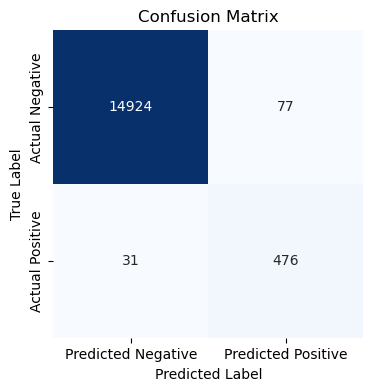

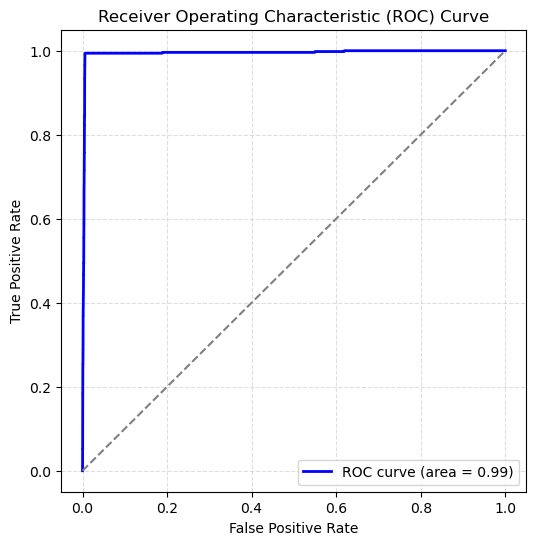

In [21]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [22]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[14924    77]
 [   31   476]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.86      0.94      0.90       507

    accuracy                           0.99     15508
   macro avg       0.93      0.97      0.95     15508
weighted avg       0.99      0.99      0.99     15508



**True Negatives** (TN): 14,924
Number of healthy loans correctly classified as healthy (0).

**False Positives** (FP): 77
Number of healthy loans incorrectly classified as high-risk (1).

**False Negatives** (FN): 31
Number of high-risk loans incorrectly classified as healthy (0).

**True Positives** (TP): 476
Number of high-risk loans correctly classified as high-risk (1).

**Class 0 (Healthy Loan):** The model performs excellently, with perfect precision and near-perfect recall, 
meaning it identifies healthy loans with very high accuracy.

**Class 1 (High-Risk Loan):** The model performs well but slightly less so than for Class 0. 
It has a high recall, indicating that it identifies most high-risk loans, though with slightly lower precision.

In [23]:
# What Happends if we keep all columns in this example

In [24]:
# Define our features
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']

In [25]:
# SCALE the NUMERIC Features FIRST

# subset
df_sub = df.loc[:, features]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

# predict/transform
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=features)

df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


In [26]:
df_scaled.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,7.753600e+04,77536.000000,7.753600e+04,7.753600e+04,7.753600e+04,77536.000000
mean,0.000000,-1.407596e-15,0.000000,-1.196457e-15,-4.691987e-17,-5.864983e-17,0.000000
std,1.000006,1.000006e+00,1.000006,1.000006e+00,1.000006e+00,1.000006e+00,1.000006
min,-2.295787,-2.296073e+00,-2.296096,-4.628640e+00,-2.009337e+00,-6.739731e-01,-2.296096
25%,-0.528166,-5.253942e-01,-0.528210,-5.760741e-01,-4.340494e-01,-6.739731e-01,-0.528210
50%,-0.145978,-1.352827e-01,-0.134019,-1.249033e-02,9.104661e-02,-6.739731e-01,-0.134019
75%,0.283984,2.649469e-01,0.260172,4.787266e-01,9.104661e-02,1.043996e+00,0.260172
max,6.685636,6.680987e+00,6.686676,4.140328e+00,6.392198e+00,4.479933e+00,6.686676


In [27]:
# Step 1: Get the data
X = df_scaled
y = df.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages

In [28]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[55958   319]
 [   37  1838]]
    
    AUC: 0.9943631063015679

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.98      0.91      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.95     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [   14   611]]
    
    AUC: 0.996492776800469

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384

    


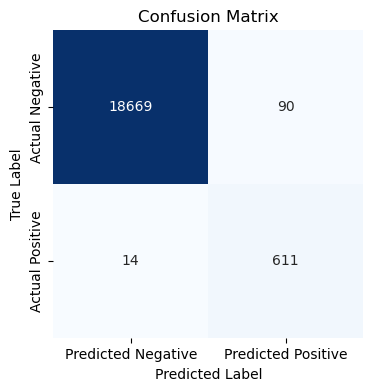

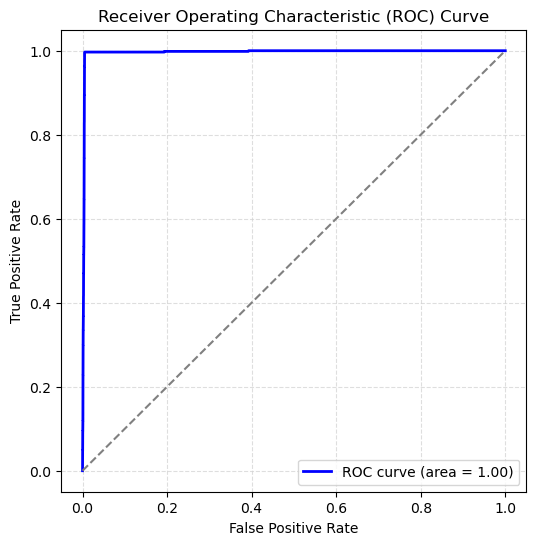

In [29]:
# LogisticRegression: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[56224    53]
 [  102  1773]]
    
    AUC: 0.9998578886578886

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.97      0.95      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.98      0.97      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18683    76]
 [  123   502]]
    
    AUC: 0.9366155552001707

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     18759
           1       0.87      0.80      0.83       625

    accuracy                           0.99     19384
   macro avg       0.93      0.90      0.91     19384
weighted avg       0.99      0.99      0.99     19384

    


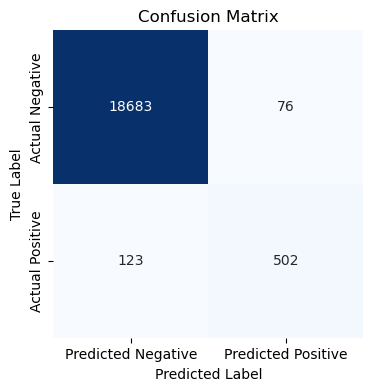

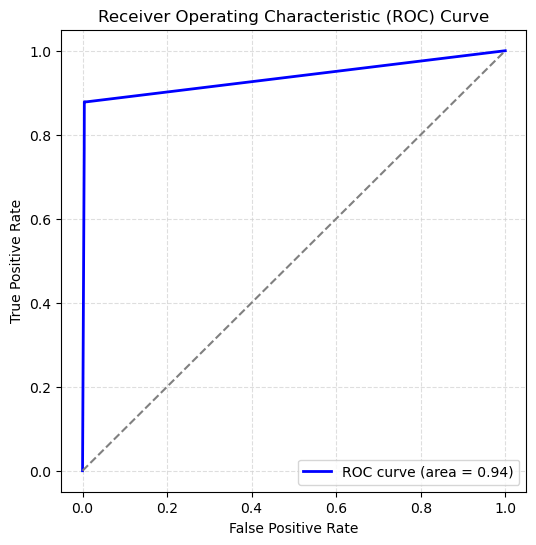

In [30]:
# DecisionTreeClassifier: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[56148   129]
 [   27  1848]]
    
    AUC: 0.9998233452387298

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.93      0.99      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18681    78]
 [   79   546]]
    
    AUC: 0.9958888640119409

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.87      0.87       625

    accuracy                           0.99     19384
   macro avg       0.94      0.93      0.94     19384
weighted avg       0.99      0.99      0.99     19384

    


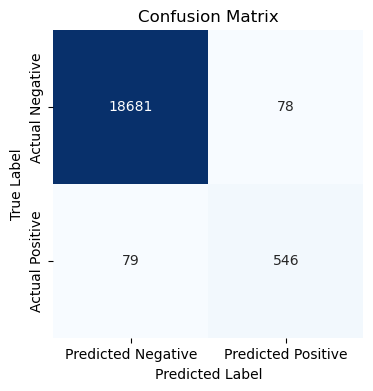

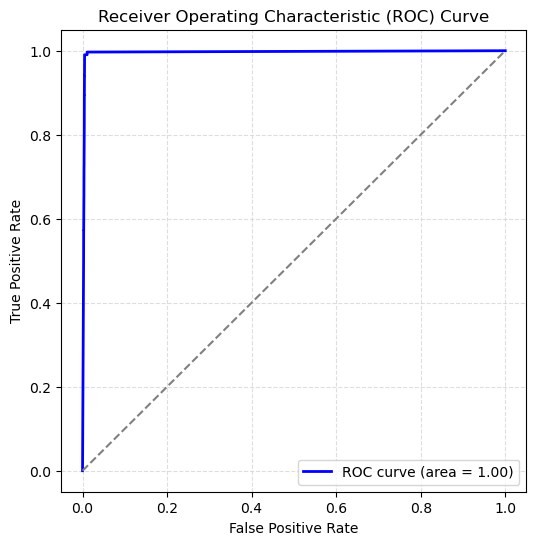

In [31]:
# RandomForestClassifier: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55949   328]
 [   12  1863]]
    
    AUC: 0.9957468142698911

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    3   622]]
    
    AUC: 0.9953770670078362

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      1.00      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      1.00      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


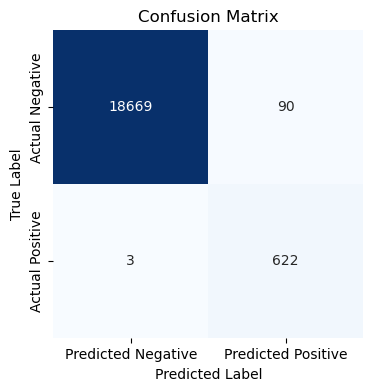

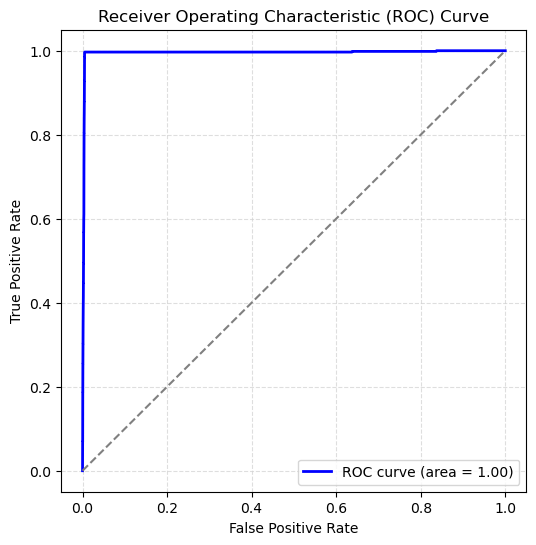

In [32]:
# SVC: Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55951   326]
 [   15  1860]]
    
    AUC: 0.9973727478958248

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    5   620]]
    
    AUC: 0.996005202835972

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


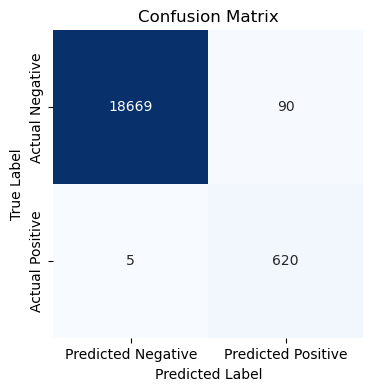

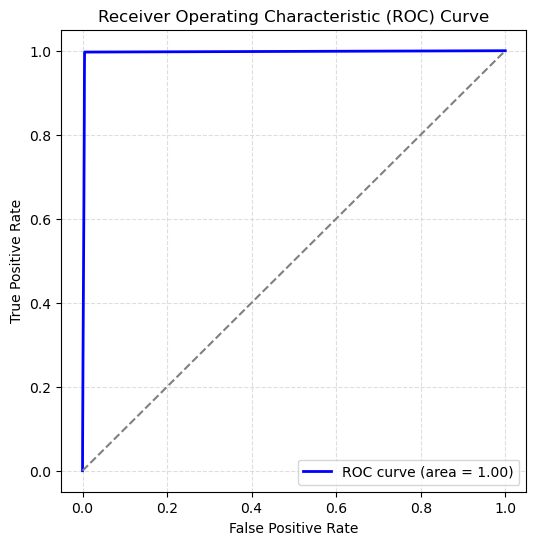

In [33]:
# KNeighborsClassifier: Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[56224    53]
 [  102  1773]]
    
    AUC: 0.9998578886578886

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.97      0.95      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.98      0.97      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18681    78]
 [  110   515]]
    
    AUC: 0.961435769497308

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     18759
           1       0.87      0.82      0.85       625

    accuracy                           0.99     19384
   macro avg       0.93      0.91      0.92     19384
weighted avg       0.99      0.99      0.99     19384

    


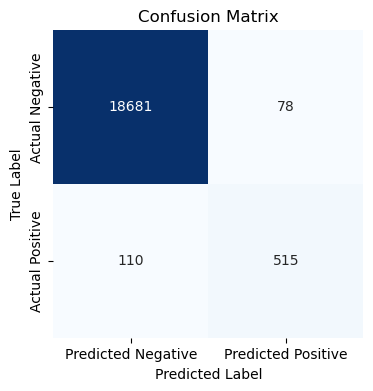

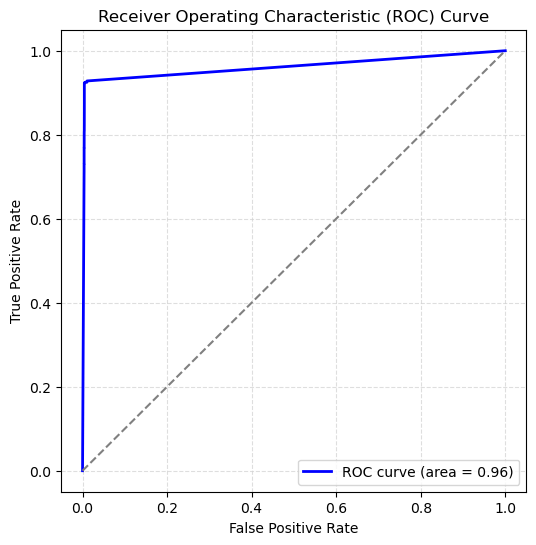

In [34]:
# ExtraTreesClassifier: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55954   323]
 [   15  1860]]
    
    AUC: 0.9970676854369163

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    5   620]]
    
    AUC: 0.9964305986459833

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


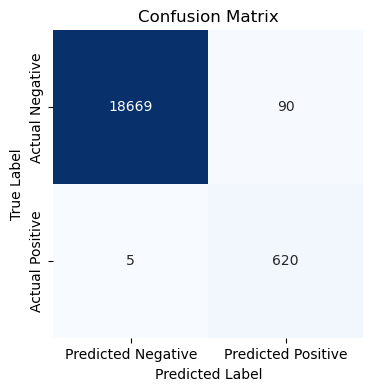

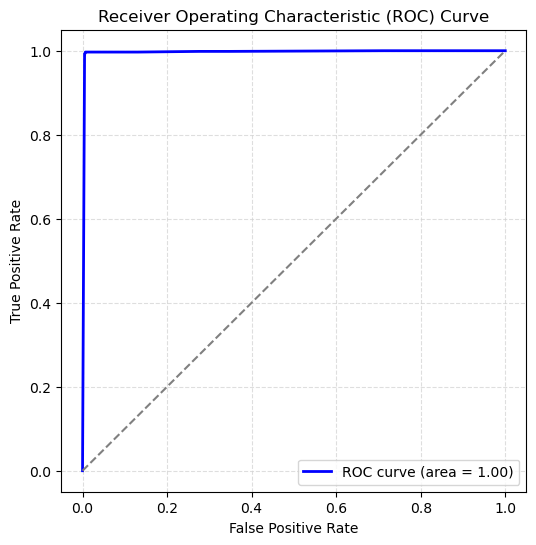

In [35]:
# AdaBoostClassifier: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55965   312]
 [   10  1865]]
    
    AUC: 0.9983701855701855

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.86      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18668    91]
 [    6   619]]
    
    AUC: 0.9952849938696093

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      1.00     19384

    


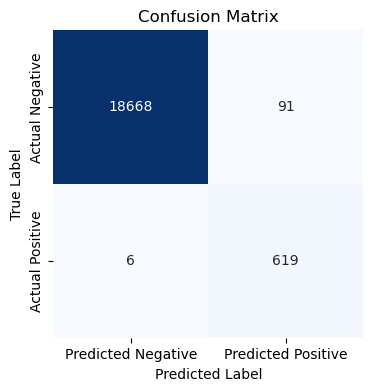

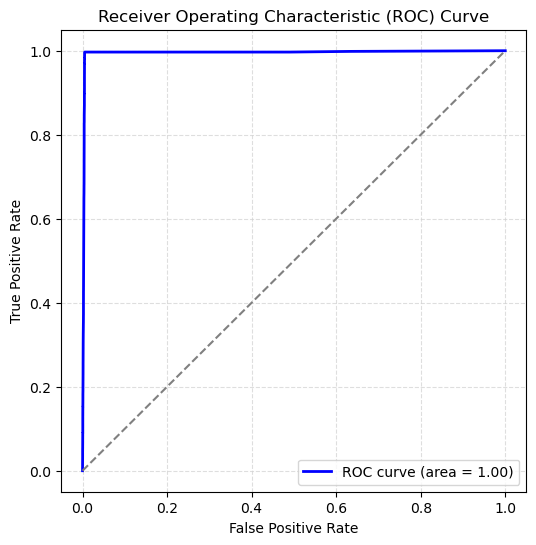

In [36]:
# GradientBoostingClassifier: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55954   323]
 [   13  1862]]
    
    AUC: 0.997842699504238

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    4   621]]
    
    AUC: 0.9956511114664961

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


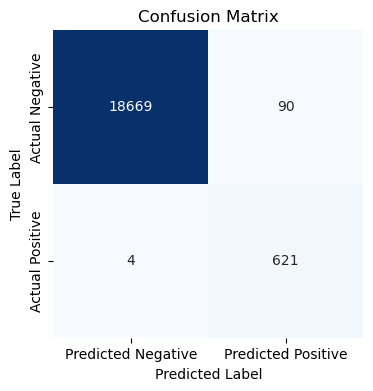

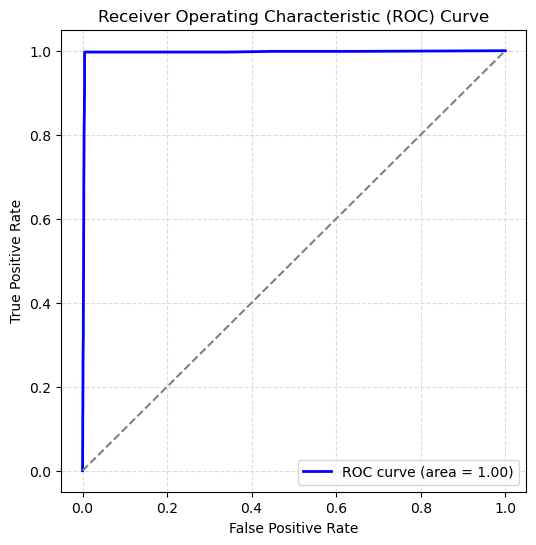

In [37]:
# XGBClassifier: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

In [44]:
# Create an empty DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Create a DataFrame for the current model's results
    model_results = pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }])
    
    # Append the current model's results to the results DataFrame
    global results
    results = pd.concat([results, model_results], ignore_index=True)

# Instantiate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier()
}

# Evaluate models
for model_name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test, model_name)

# Print results
print(results)


[LightGBM] [Info] Number of positive: 1875, number of negative: 56277
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1212
[LightGBM] [Info] Number of data points in the train set: 58152, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032243 -> initscore=-3.401677
[LightGBM] [Info] Start training from score -3.401677
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression  0.994635   0.871612  0.9776  0.921569
1        Random Forest  0.991901   0.875000  0.8736  0.874299
2             AdaBoost  0.995099   0.873239  0.9920  0.928839
3          Extra Trees  0.990559   0.873311  0.8272  0.849630
4    Gradient Boosting  0.994996   0.871831  0.9904  0.927341
5          K-Neighbors  0.994119   0.870827  0.9600  0.913242
6         

In [46]:
# Create DataFrame with results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'AdaBoost', 'Extra Trees', 'Gradient Boosting', 'K-Neighbors', 'XGBoost', 'LGBM'],
    'Accuracy': [0.994635, 0.991901, 0.995099, 0.990559, 0.994996, 0.994119, 0.995151, 0.994996],
    'Precision': [0.871612, 0.875000, 0.873239, 0.873311, 0.871831, 0.870827, 0.873418, 0.872881],
    'Recall': [0.9776, 0.8736, 0.9920, 0.8272, 0.9904, 0.9600, 0.9936, 0.9888],
    'F1-Score': [0.921569, 0.874299, 0.928839, 0.849630, 0.927341, 0.913242, 0.929641, 0.927232]
})

# Sort results by F1-Score in descending order
sorted_results = results.sort_values(by='F1-Score', ascending=False)

# Print sorted results
print(sorted_results)


                 Model  Accuracy  Precision  Recall  F1-Score
6              XGBoost  0.995151   0.873418  0.9936  0.929641
2             AdaBoost  0.995099   0.873239  0.9920  0.928839
4    Gradient Boosting  0.994996   0.871831  0.9904  0.927341
7                 LGBM  0.994996   0.872881  0.9888  0.927232
0  Logistic Regression  0.994635   0.871612  0.9776  0.921569
5          K-Neighbors  0.994119   0.870827  0.9600  0.913242
1        Random Forest  0.991901   0.875000  0.8736  0.874299
3          Extra Trees  0.990559   0.873311  0.8272  0.849630


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model is **moderate** maybe conservative effective in predicting healthy loans with perfect precision and very high recall. It also performs well with high-risk loans, with high recall and reasonable precision. The model's accuracy and F1-scores indicate that it is very reliable overall, making it suitable for distinguishing between healthy and high-risk loans.

However by keeping all the collumns and running it thru several models we can deduct:

**Best Performers:** XGBoost and AdaBoost are the best models for predicting both healthy and high-risk loans, offering the highest F1-Scores, indicating strong overall performance.
**Competitors:** Gradient Boosting and LightGBM are also highly effective with nearly comparable results.
**Moderate Performers:** Logistic Regression and K-Neighbors perform well but with slightly lower F1-Scores.
**Lower Performers:** Random Forest and Extra Trees have lower F1-Scores, showing weaker performance in capturing high-risk loans.

This detailed comparison helps in selecting the most suitable model based on the need for high precision, recall, or overall balance.

---